In [62]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./stack-overflow-developer-survey-2024/survey_results_public.csv")

In [24]:
pd.set_option('display.max_columns', None)
print(list(df.columns))


['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',

In [2]:
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedCompYearly"]]
df.head()

,Country,EdLevel,YearsCodePro,Employment,ConvertedCompYearly
0,United States of America,Primary/elementary school,NaN,"Employed, full-time",NaN
1,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",NaN
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Employed, full-time",NaN
3,Canada,Some college/university study without earning ...,NaN,"Student, full-time",NaN
4,Norway,"Secondary school (e.g. American high school, G...",NaN,"Student, full-time",NaN


In [3]:
df = df.rename({"ConvertedCompYearly": "Salary"}, axis = 1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,United States of America,Primary/elementary school,NaN,"Employed, full-time",NaN
1,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",NaN
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Employed, full-time",NaN
3,Canada,Some college/university study without earning ...,NaN,"Student, full-time",NaN
4,Norway,"Secondary school (e.g. American high school, G...",NaN,"Student, full-time",NaN


In [27]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
72,Pakistan,"Secondary school (e.g. American high school, G...",1,"Employed, full-time;Student, full-time;Indepen...",7322.0
374,Austria,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",6,"Employed, full-time",30074.0
379,Turkey,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time",91295.0
385,France,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",17,"Independent contractor, freelancer, or self-em...",53703.0
389,United States of America,Some college/university study without earning ...,7,"Employed, full-time;Student, part-time",110000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       58930 non-null  object 
 1   EdLevel       60784 non-null  object 
 2   YearsCodePro  51610 non-null  object 
 3   Employment    65437 non-null  object 
 4   Salary        23435 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.5+ MB


In [10]:
df = df.dropna()
df.isnull().sum()
# df.info()

Country         0
EdLevel         0
YearsCodePro    0
Salary          0
dtype: int64

In [11]:
# Check if 'Employment' column exists
if 'Employment' in df.columns:
    df = df[df["Employment"] == "Employed, full-time"]
    df = df.drop("Employment", axis=1)
else:
    print("The 'Employment' column does not exist in the DataFrame")

# Display DataFrame info
df.head()

The 'Employment' column does not exist in the DataFrame


,Country,EdLevel,YearsCodePro,Salary
374,Austria,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",6,30074.0
379,Turkey,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,91295.0
392,United Kingdom of Great Britain and Northern I...,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",18,161044.0
395,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",25,121018.0
398,United States of America,Some college/university study without earning ...,30,195000.0


In [26]:
df['Country'].value_counts()
df['Country'].value_counts().index



Index(['United States of America', 'Germany',
       'United Kingdom of Great Britain and Northern Ireland', 'Ukraine',
       'India', 'France', 'Canada', 'Brazil', 'Spain', 'Italy',
       ...
       'Mozambique', 'Mauritania', 'Brunei Darussalam', 'Samoa', 'Lesotho',
       'Botswana', 'Barbados', 'Senegal', 'Suriname', 'Mali'],
      dtype='object', name='Country', length=155)

In [27]:
def shorten_categories(categories, cut_off):
    category_map = {}

    for i in range(len(categories)):
        if categories.values[i] >= cut_off:
            category_map[categories.index[i]] = categories.index[i]
        else:
            category_map[categories.index[i]] = "Others"
    return category_map


In [29]:
Country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(Country_map)
df['Country'].value_counts()

Country
Others                                                  5628
United States of America                                3903
Germany                                                 1491
United Kingdom of Great Britain and Northern Ireland    1141
Ukraine                                                 1017
India                                                    836
France                                                   719
Canada                                                   684
Brazil                                                   457
Spain                                                    431
Italy                                                    414
Netherlands                                              406
Australia                                                400
Name: count, dtype: int64

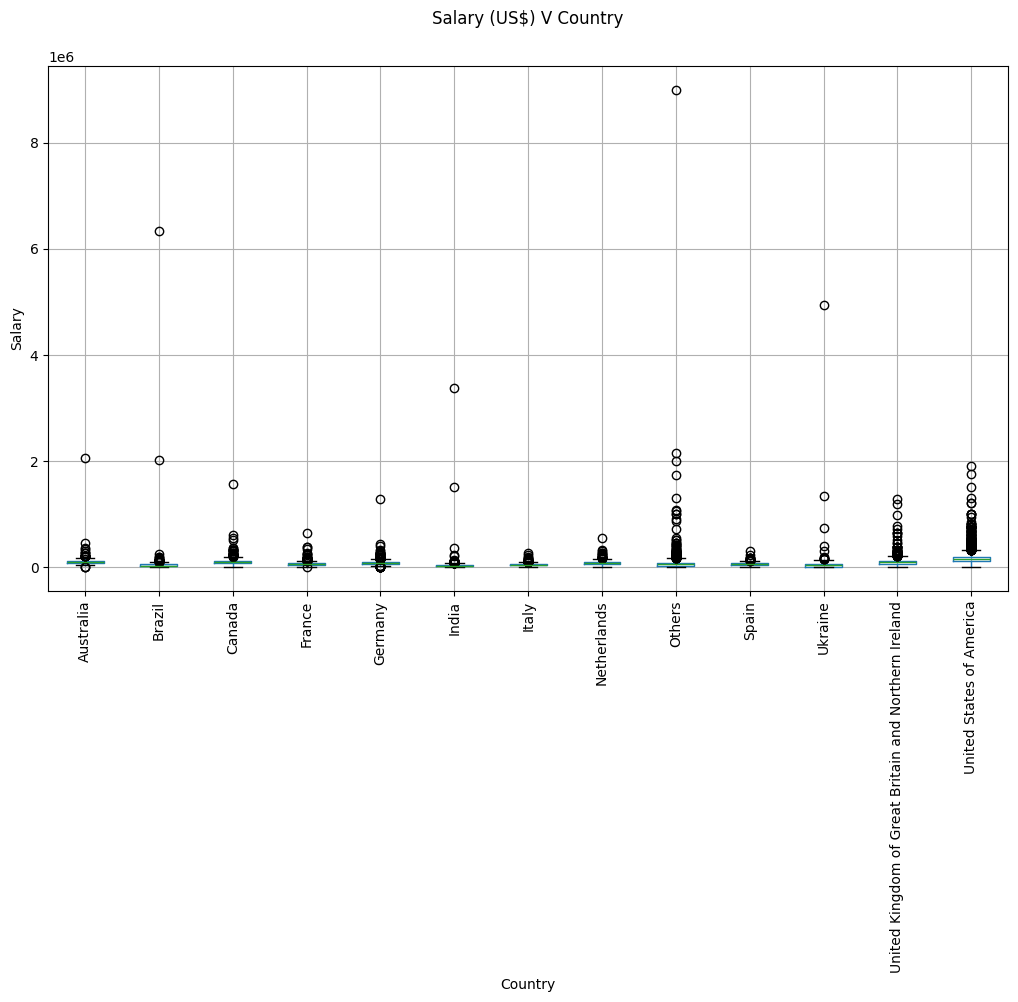

In [30]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) V Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [31]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df["Country"] != "Others"]

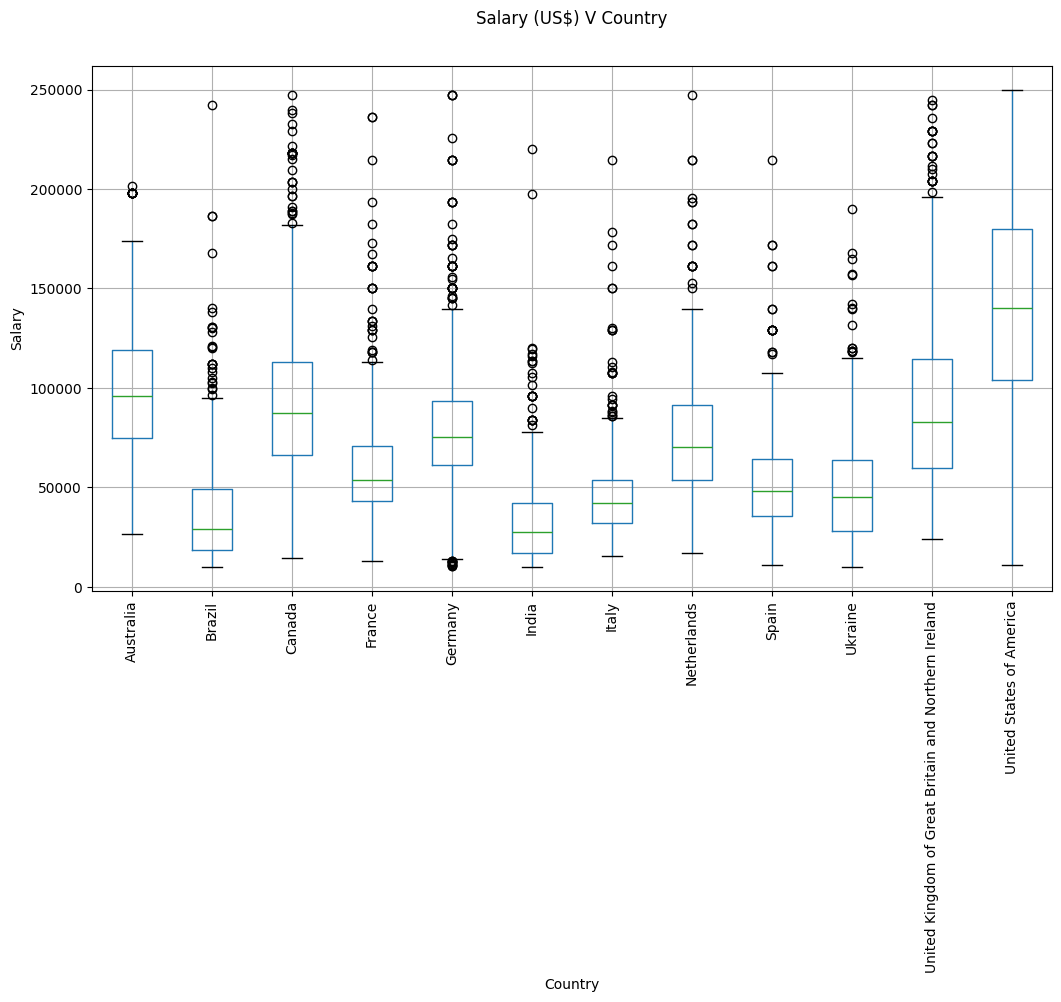

In [32]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) V Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [34]:
df["YearsCodePro"].unique()

array(['18', '25', '30', '50', '27', '1', '15', '11', '23', '17', '10',
       '8', '12', '26', '40', '4', '9', '22', '28', '20', '16', '13', '3',
       '35', '5', '31', '41', '36', '6', '14', '7', 'Less than 1 year',
       '24', '2', '38', '32', '21', '19', '34', '29', '43', '33', '45',
       '37', '44', '42', '39', '46', '49', '48', '47'], dtype=object)

In [35]:
def clean_experience(years):
    if years == 'Less than 1 year':
        return 0.5
    return float(years)


df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)
df["YearsCodePro"].unique()

array([18. , 25. , 30. , 50. , 27. ,  1. , 15. , 11. , 23. , 17. , 10. ,
        8. , 12. , 26. , 40. ,  4. ,  9. , 22. , 28. , 20. , 16. , 13. ,
        3. , 35. ,  5. , 31. , 41. , 36. ,  6. , 14. ,  7. ,  0.5, 24. ,
        2. , 38. , 32. , 21. , 19. , 34. , 29. , 43. , 33. , 45. , 37. ,
       44. , 42. , 39. , 46. , 49. , 48. , 47. ])

In [63]:
df["EdLevel"].unique()

array(['Primary/elementary school',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Something else', nan],
      dtype=object)

In [71]:
def clean_edlevel(level):
    if isinstance(level, float) and pd.isna(level):
        return ""
    level = level.replace("’", "'") if isinstance(level, str) else level
    if "Bachelor's degree" in level:
        return "Bachelor's degree"
    if "Master's degree" in level:
        return "Master's degree"
    if "Professional degree" in level or "Other doctoral" in level:
        return "Post grad"
    return "Less than a Bachelors"

df["EdLevel"] = df["EdLevel"].apply(clean_edlevel)
df["EdLevel"].unique()

array(['Less than a Bachelors', "Bachelor's degree", "Master's degree",
       ''], dtype=object)